/Users/Ivan/Code/Tracking/Antrack/matlab/vot-toolkit/antrack/sequences/handball1
377
processing image:    0 / 377


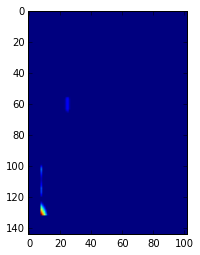

In [16]:
__author__ = 'Ivan'
%matplotlib inline
import objectness_python
from Dataset import VOT2015Dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib import gridspec
import re
import os
import time
import math
import copy
from ObjectnessVisualizer import ObjectnessVizualizer


root_folder = '/Users/Ivan/Code/Tracking/Antrack/matlab/vot-toolkit/antrack/sequences'
vot = VOT2015Dataset(root_folder)

superpixels = 200

obj = ObjectnessVizualizer(vot)
videos = [30]
video_number = videos[0]
video = obj.dataset.video_folders[video_number]
boxes = obj.dataset.readGroundTruthAll(video)
print video
print len(boxes)
images = obj.dataset.getListOfImages(video)

R = 60
scale_R = 60
min_size_half = 10
min_scales=0
max_scales =0
downsample=1.05
shrink_one_size = 0

superpixels = 200
inner = 0.9

s=re.split('/',video)
video_name = s[len(s)-1]

#for i in range(0, len(images)):
for i in range(0,1):
    print "processing image: ", " " , i ,"/", len(images)
    obj = objectness_python.Objectness()
    box=boxes[i]
    im_name = images[i]
    img = cv2.imread(im_name,1)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    height = img.shape[0]
    width = img.shape[1]

    (min_x, min_y, max_x, max_y) = ObjectnessVizualizer.correctDims(box, width, height, R)

    small_image = img[min_y:max_y, min_x :max_x]
    obj.readImage(im_name)

    pt1=(box[0] - min_x, box[1] - min_y)
    pt2=(box[0] - min_x + box[2], box[1] -min_y + box[3])
    cv2.rectangle(small_image, pt1,pt2, (100,0,150), 2)
    cv2.rectangle(img, (min_x, min_y), (max_x, max_y), (0,255,200),2)
    small_image = ObjectnessVizualizer.drawRectangle(small_image, box , R)
    obj.smallImage(R, box[0], box[1], box[2], box[3])

    a = obj.process(superpixels,inner, 0,
                    R, scale_R, min_size_half, min_scales, max_scales,
                    downsample, shrink_one_size,
                    box[0], box[1], box[2], box[3])
    
    fig = plt.figure()
    
    plt.imshow(a[0])
    plt.show()
    